### Homework 2 - Machine Learning Course 
Eyal Halabi - 312141542
<br>
Keren Leor - 

In [13]:
# import modules used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# convert excel files into dataframe
crimes_df = pd.read_excel('crimes.xlsx')
cities_df = pd.read_excel('cities.xlsx')
mapping_df = pd.read_excel('mapping.xlsx')


In [14]:
cities_df.head()

,שם יישוב,סמל יישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות
0,אבו ג'ווייעד (שבט),967,ABU JUWEI'ID,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,2.040057e+09,NaN,699.0,15003711.0,2018,Abu Juway'ad,NaN
1,אבו גוש,472,ABU GHOSH,1,11,111.0,99.0,444.0,2.0,7543.0,...,NaN,280,NaN,2.105263e+09,598.0,152.0,10002475.0,2018,Abu Ghosh,NaN
2,אבו סנאן,473,ABU SINAN,2,24,245.0,99.0,NaN,2.0,13915.0,...,NaN,270,NaN,2.160776e+09,19.0,252.0,10004315.0,2018,Abu Sinan,NaN
3,אבו סריחאן (שבט),935,ABU SUREIHAN,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.865057e+09,NaN,699.0,10001937.0,2018,Abu Surayhan,NaN
4,אבו עבדון (שבט),958,ABU ABDUN,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.850058e+09,NaN,699.0,10001937.0,2018,Abu 'Abdun,NaN


In [15]:
def convert_cities_titles_english():
    cities_df.rename(columns = {'שם יישוב':'City name - hebrew'}, inplace = True)
    cities_df.rename(columns = {'סמל יישוב':'City symbol'}, inplace = True)
    cities_df.rename(columns = {'תעתיק':'City name - english'}, inplace = True)
    cities_df.rename(columns = {'מחוז':'region'}, inplace = True)
    cities_df.rename(columns = {'נפה':'napi'}, inplace = True)
    cities_df.rename(columns = {'אזור טבעי':'netuarl zone'}, inplace = True)
    cities_df.rename(columns = {'מעמד מונציפאלי':'montzipalic status'}, inplace = True)
    cities_df.rename(columns={'שיוך מטרופוליני': 'metropolitan belongs'}, inplace=True)
    cities_df.rename(columns={'דת יישוב': 'city religion'}, inplace=True)
    cities_df.rename(columns={'סך הכל אוכלוסייה 2018': 'total number of people'}, inplace=True)
    cities_df.rename(columns={'יהודים ואחרים': 'jewish and others'}, inplace=True)
    cities_df.rename(columns={'מזה: יהודים': 'jewish amount'}, inplace=True)
    cities_df.rename(columns={'ערבים': 'arabs'}, inplace=True)
    cities_df.rename(columns={'שנת ייסוד': 'establishment year'}, inplace=True)
    cities_df.rename(columns={'צורת יישוב שוטפת': 'city shape'}, inplace=True)
    cities_df.rename(columns={'השתייכות ארגונית': 'belongs to organization'}, inplace=True)
    cities_df.rename(columns={'קואורדינטות': 'coordinates'}, inplace=True)
    cities_df.rename(columns={'גובה': 'height'}, inplace=True)
    cities_df.rename(columns={'ועדת תכנון': 'planning community'}, inplace=True)
    cities_df.rename(columns={'מרחב משטרה': 'police area'}, inplace=True)
    cities_df.rename(columns={'שנה': 'year'}, inplace=True)
    cities_df.rename(columns={'שם יישוב באנגלית': 'city english name'}, inplace=True)
    cities_df.rename(columns={'אשכול רשויות מקומיות': 'Local authority cluster'}, inplace=True)

def convert_crimes_titles_english():
    # convert crimes dataframe hebrew columns to english
    crimes_df.rename(columns = {'סמל יישוב':'City symbol'}, inplace = True)
    crimes_df.rename(columns = {'יישוב מחושב':'City name'}, inplace = True)
    crimes_df.rename(columns = {'תאור קבוצה סטטיסטית':'Violation type'}, inplace = True)
    crimes_df.rename(columns = {'שנת הודעה':'Year message'}, inplace = True)

convert_cities_titles_english()
convert_crimes_titles_english()

In [16]:
def replace_dashes_on_zeros():
    for year in range(2014,2020):
        # replace '-' values in 0 on vilations columns
        crimes_df[year].replace({'-': 0}, inplace=True)

replace_dashes_on_zeros()


In [17]:
def add_undefined_crimes_to_others():
    # for index in crimes_df.index:
    #     if crimes_df.loc[index, 'Violation type'] == '-':
    #         for year in range(2014,2020):
    #             crimes_df.loc[index + 12, year] = crimes_df.loc[index + 12, year] + crimes_df.loc[index, year]
    #         crimes_df.loc[index + 12, 'Total'] = crimes_df.loc[index + 12, 'Total'] + crimes_df.loc[index, 'Total']
    
    # Get indexes where name column which have '-'
    indexNames = crimes_df[~(crimes_df['Violation type'] != '-')].index
    crimes_df.drop(indexNames, inplace=True)
    crimes_df.reset_index(inplace=True)

add_undefined_crimes_to_others()

In [18]:
def calc_crimes_totals():
    for index in crimes_df.index:
        if crimes_df.loc[index, 'Violation type'] == 'Total':
            # get next Total row index
            totals = crimes_df.loc[index+1:][crimes_df['Violation type'] == 'Total']
            nextTotalIndex = totals.index[0] if not totals.empty else crimes_df.index[-1] + 1
            for year in range(2014,2020):
                # sum the city crimes during one year
                crimes_df.loc[index, year] = crimes_df.loc[index + 1:nextTotalIndex - 1, year].sum()
            # sum the city crimes during years
            crimes_df.loc[index, 'Total'] = crimes_df.loc[index, [2014,2015,2016,2017,2018,2019]].sum()
    # sum the cities totals crimes
    for year in range(2014,2020):
        crimes_df.loc[0, year] = crimes_df.loc[lambda x: x['Violation type'] == 'Total', year].sum()
    crimes_df.loc[0, 'Total'] = crimes_df.loc[lambda x: x['Violation type'] == 'Total', 'Total'].sum()
    
calc_crimes_totals()

ipykernel_launcher:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [19]:
cities_df.drop('belongs to organization', 1, inplace=True)
cities_df.drop('Local authority cluster', 1, inplace=True)

cities_df.head()

merged_df = crimes_df.merge(cities_df, on = ['City symbol'] , how='inner').reset_index()


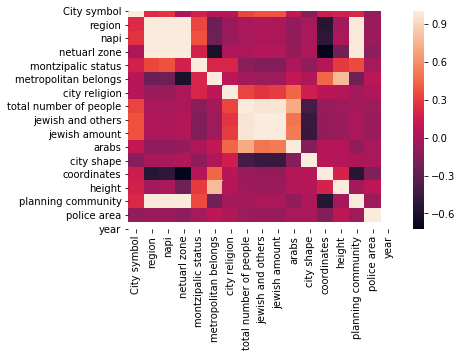

In [20]:
corrMatrix = cities_df.corr()
sn.heatmap(corrMatrix)
plt.show()

In [21]:
def crimes_people_plot(list1, list2, label1, label2):
    plt.title('Title...')
    plt.xlabel('Crimes number')
    plt.ylabel('People number')
    # plt.plot(list1, list2, linestyle='--', marker='o', color='b', label = label1)
    plt.scatter(list1, list2)
    # plt.legend()
    plt.show()

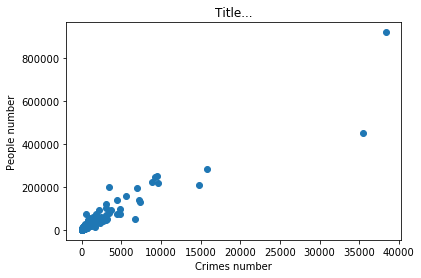

In [23]:
crimes_list = merged_df.loc[merged_df['Violation type'] == 'Total'][2018]
people_number = merged_df.loc[merged_df['Violation type'] == 'Total']['total number of people']

crimes_people_plot(crimes_list, people_number, 'crimes number', 'people number')

### Exercise 4

In [ ]:
def split_train_test(df, cityCode, x_columns, y_column):    
    pass

# df.loc[crimes_df['Violation type'] != 'Total', :]
x_columns = [2018,2017,2016,2015,2014, 'City symbol']
y_column = [2019]
df = crimes_df.loc[1:, x_columns]
df.head(20)
cityCode = 216

# x_train, x_test, y_train, y_test = split_train_test(crimes_df, cityCode, x_columns, y_columns)





